In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2.6 从 JSON 数据源导入数据 の 工作原理
## 2.6.3 工作原理
1. 使用 requests 模块获取远程数据资源 (requests 模块提供简单的 API 来定义 HTTP 谓词，我们只需要发出 get() 方法调用，获取数据和请求元数据后，将他们封装到 Response 对象，以供进一步处理)
2. 利用 Response.json() 方法将读取 Response.content 的内容 将它解析成 JSON 同时加载到 JSON 对象中
3. 利用已有 JSON 对象 处理数据

# 2.7 导出数据到 JSON CSV Excel
## 2.7.3 工作原理
1. 导入定宽数据集合 接着导出至 stdot 然后将之存到文件
2. 从命令行执行程序 给定两个必选参数：输入文件名 nad 导出文件格式
3. 解析这些参数好 将输入文件分派给 import_data 方法 (该方法返回 Python 数据结构<列表的列表> 则得到对其进行操作并得到合适的输出格式)
4. 在 write_dara() 方法中 只是将请求由给合适的方法 write_csv ,json , xlsx
5. 在 CSV 中 得到一个 csv.writer() instance 然后将迭代过得每一行数据写入 之后将要把输出从我们的程序重定向到另一个程序 (或者仅仅是对文件执行 cat 操作) so 仅仅是简单的返回给定的字符串
6. json 模块 提供的 dump 方法 可很轻松地读取 python 数据结构
7. 最后将 Book instance 保存成文件流 这样就可将之返回给 stdout 后既可以将内容读取到文件中 亦可让 web service 来使用

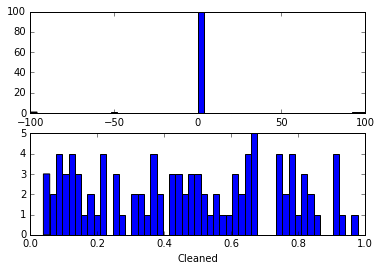

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def is_outlier(points,threshold=3.5):
	'''
	Return a boolean array with True id points asr outliers and False otherwise

	Data points with a modified z-score greater than this
	# value will be calssified as outlier
	'''
	# transform into vector
	if len(points.shape) == 1:
		points = points[:,None]
	# compute median value
	median = np.median(points,axis=0)
	# compute diff sums along the axis
	diff = np.sum((points - median) ** 2,axis=1)
	diff = np.sqrt(diff)
	# compute MAD
	med_abs_deviation = np.median(diff)

	# compute modified Z-score
	# http://www.itl.nist.gov/dic898/handbook/eda/section4/eda43.htm#
	# Inlewicz
	modified_z_score = 0.6745 * diff / med_abs_deviation

	# return a mask for each outlier
	return modified_z_score > threshold

# Random data
x = np.random.random(100)
# histogram buckets
buckets = 50

# Add in a few outliers
x = np.r_[x,-49,95,100,-100]

# Keep valid data points
# Note here that
# '~' is logical NOT on boolean numpy arrays
filtered = x[~is_outlier(x)]

# plot histograms
plt.figure()

plt.subplot(211)
plt.hist(x,buckets)
plt.xlabel('Raw')

plt.subplot(212)
plt.hist(filtered,buckets)
plt.xlabel('Cleaned')

plt.show()

In [4]:
~numpy.array(False)

True

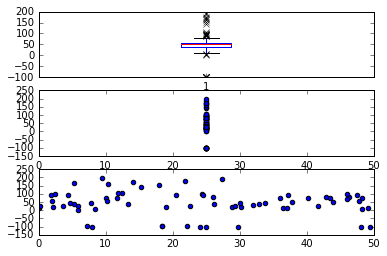

In [7]:
from pylab import *

# fake up some data
spread = rand(50) * 100
center = ones(50) * 50

# generate some outliers high and low
flier_high = rand(10) * 100 + 100
flier_low = rand(10) - 100

# merge generated data set
data = concatenate((spread,center,flier_high,flier_low),0)

subplot(311)
# basic plot
# 'gx' defining the outlier plotting properties
boxplot(data,0,'gx')
# compare this with similar scatter plot
subplot(312)
spread_1 = concatenate((spread,flier_high,flier_low),0)
center_1 = ones(70) * 25
scatter(center_1,spread_1)
xlim([0,50])

# and with another that is more appropriate fo scatter plot
subplot(313)
center_2 = rand(70) * 50
scatter(center_2,spread_1)
xlim([0,50])
show()

### 上述 code and figure
1. figure 1 可以看出其中由 X 形状标记标识出的异常值
2. figure 2 以散点图形式显示相似的数据集合 (因为 数据的 X 轴坐标取值都是 25) [无法区分 负向异常值 inlier and 正向异常值 outlier]
3. figure 3 在 X 轴上生成 分布 0--50 的范围内 可容易看出值与值之间的不同 同时在 Y 轴上可看出异常值

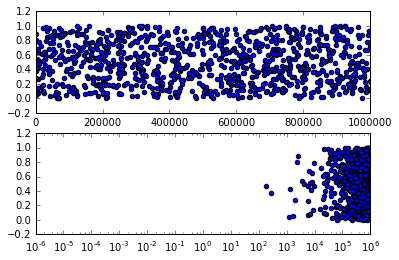

In [8]:
# generate uniform data points
x = 1e6 * rand(1000)
y = rand(1000)

figure()

subplot(211)
# make scatter plot
scatter(x,y)
# limit x axis
xlim(1e-6,1e6)

subplot(212)
scatter(x,y)
# BUT make x axis logarithmic
xscale('log')
xlim(1e-6,1e6)

show()